<font size="6"><b>Logistic Regression</b></font>

Table of Contents
<div id="toc"></div>

# 1. Linear Classification: Logistic Regression

## 1.1. Using all Distances
- Logistic regression is a classification algorithm - don't be confused


- Perceptron: make use of sign of data
- SVM: make use of margin (minimum distance)

- We want to use _distance information of all data points_ $\rightarrow$ logistic regression

<img src="./image_files/logistic_regression_distance.png", width=600>

- basic idea: find the decision boundary (hyperplane) of $g(x)=\omega^T x =0$ such that maximizes $\prod_i \lvert h_i \rvert$
    - Inequality of arithmetic and geometric means
$$ \frac{x_1+x_2}{2} \geq \sqrt{x_1 x_2} $$ 
 and that equality holds if and only if $x_1 = x_2$


- Roughly speaking, this optimization of $\max \prod_i \lvert h_i \rvert$ tends to position a hyperplane in the middle of two classes

$$h = \frac{g(x)}{\lVert \omega \rVert} = \frac{\omega^T x}{\lVert \omega \rVert} \approx \omega^T x$$


- We link or squeeze $(-\infty, +\infty)$ to $(0,1)$ for several reasons:

<img src="./image_files/link_function.png", width=500>

- If $\sigma(z)$ is the sigmoid function, or the logistic function
$$ \sigma(z) = \frac{1}{1+e^{-z}} \implies \sigma(\omega^T x) = \frac{1}{1+e^{-\omega^T x}}$$
 - logistic function generates a value where is always either 0 or 1
 - Crosses 0.5 at the origin, then flattens out
 - monotonic: same or similar optimziation solution
 - continuous and differentiable: good for gredient descent optimization
 - probability or confidence: can be considered as probability
 
 $$P\left(y = +1 \mid x,\omega\right) = \frac{1}{1+e^{-\omega^T x}} \in [0,1]$$
 <br>
 - Often we do note care about predicting the label $y$ for an example

 - Rather, we want to predict the label probabilities $P\left(y \mid x,\omega\right)$
    - $P\left(y = +1 \mid x,\omega\right)$: the probability that the label is $+1$
    - $P\left(y = 0 \mid x,\omega\right) =  1 - P\left(y = +1 \mid x,\omega\right)$: the probability that the label is $0$
    - In a sense, it is our confidence in the predicted label


- Goal: we need to fit $\omega$ to our data


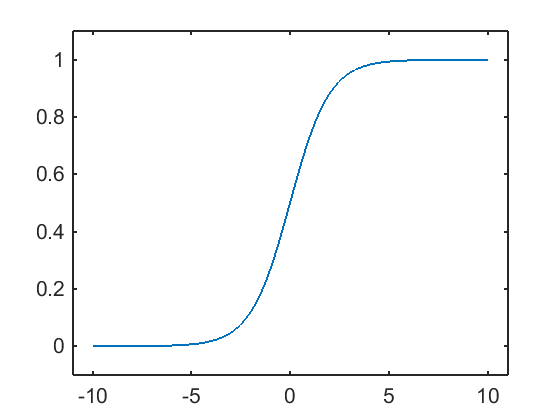

In [1]:
% What does the sigmoid function look like

z = -10:0.1:10;
s = 1./(1+exp(-z));
plot(z,s)
xlim([-11,11]), ylim([-0.1 1.1])

## 1.2. Probabilistic  Approach (or MLE)

Consider a random variable $ y \in \{0, 1\} $ 

$$P(y=+1) = p, \quad P(y=0) = 1-p$$

where $ p \in [0, 1]$, and is assumed to depend on a vector of explanatory variables $x \in \mathbb{R}^n$

the logistic model has the form


$$
\begin{align*}
p &= \frac{1}{1+e^{-\omega^T x}} = \frac{e^{\omega^T x}}{e^{\omega^T x} + 1}\\
1-p &= \frac{1}{e^{\omega^T x} + 1}
\end{align*}
$$


We can re-order the data so far $x_1, \cdots, x_q$, the outcome is $y = +1$, and for $x_{q+1}, \cdots, x_m$, the outcome is $y=0$

The likelihood function

$$\mathscr{L} = \prod\limits_{i=1}^{q}{p_i}\prod\limits_{i=q+1}^{m}{(1-p_i)}$$

the log likelihood function

$$
\begin{align*}
\mathscr{l}(\omega) &= \log \mathscr{L} = \sum\limits_{i=1}^{q}{\log p_i} + \sum\limits_{i=q+1}^{m}{\log(1 - p_i)}  \\
& = \sum\limits_{i=1}^{q}{\log \frac{\exp\left(\omega^T x_i\right)}{1 + \exp \left(\omega^T x_i \right)}} + \sum\limits_{i=q+1}^{m}{\log \frac{1}{1+\exp \left(\omega^T x_i \right)}} \\
 &= \sum\limits_{i=1}^{q}{\left(\omega^T x_i\right)} - \sum\limits_{i=1}^{m}{\log \left(1+\exp \left(\omega^T x_i \right) \right)}
\end{align*} $$

Since $\mathscr{l}$ is a concave function of $\omega$, the logistic regression problem can be solved as a convex optimization problem


$$\hat{\omega} = \arg\max_{\omega} \mathscr{l}(\omega)$$

## 1.3. Example with CVX


$$ 
\begin{align*}
\omega &= \begin{bmatrix} \omega_1 \\ \omega_2 \\ \omega_3\end{bmatrix}\\
X &= \begin{bmatrix} x_1^{(1)} & x_2^{(1)} & 1 \\x_1^{(2)} & x_2^{(2)} & 1 \\x_1^{(3)} & x_2^{(3)} & 1 \\ \vdots & \vdots & \vdots \\\end{bmatrix}
\end{align*}
$$


Source: Section 7.1.1 from http://cvxr.com/cvx/examples/cvxbook/Ch07_statistical_estim/html/logistics.html

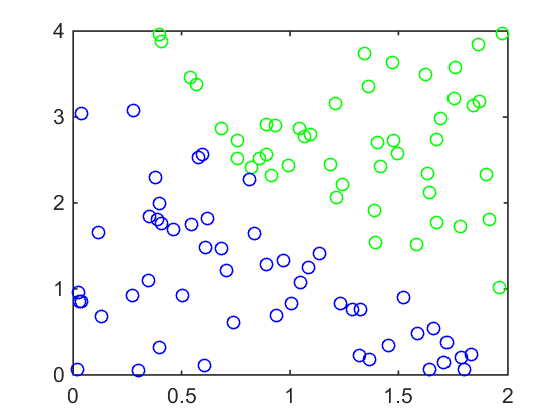

In [1]:
% Boyd & Vandenberghe, "Convex Optimization"
% Original by Lieven Vandenberghe
% Adapted for CVX by Argyris Zymnis - 01/31/06

% Generate data

rand('state',0);

m = 100;
w = [2;1;-4];

X = [2*rand(m,1) 4*rand(m,1) ones(m,1)];

y = 0.5 < exp(X*w)./(1+exp(X*w));

c1 = find(y == 1);
c2 = find(y == 0);

plot(X(c1,1),X(c1,2),'go',X(c2,1),X(c2,2),'bo');

$$
\begin{align*}
\mathscr{l}(\omega) &= \log \mathscr{L} = \sum\limits_{i=1}^{q}{\log p_i} + \sum\limits_{i=q+1}^{m}{\log(1 - p_i)}  \\
& = \sum\limits_{i=1}^{q}{\log \frac{\exp\left(\omega^T x_i\right)}{1 + \exp \left(\omega^T x_i \right)}} + \sum\limits_{i=q+1}^{m}{\log \frac{1}{1+\exp \left(\omega^T x_i \right)}} \\
 &= \sum\limits_{i=1}^{q}{\left(\omega^T x_i\right)} - \sum\limits_{i=1}^{m}{\log \left(1+\exp \left(\omega^T x_i \right) \right)}
\end{align*} $$

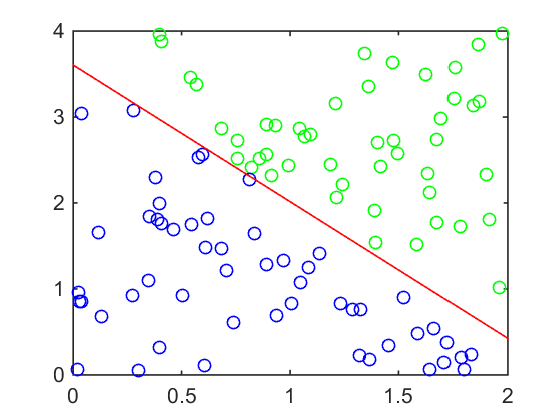

In [3]:
clear w

cvx_begin quiet
    variable w(3,1)
    maximize(y'*X*w - sum(log_sum_exp([zeros(1,m); w'*X'])))
cvx_end

xp = 0:0.1:2;
yp = (-w(3) - w(1)*xp)./w(2);

plot(X(c1,1),X(c1,2),'go',X(c2,1),X(c2,2),'bo'),    hold on
plot(xp,yp,'r'),    hold off

In [8]:
help log_sum_exp

LOG_SUM_EXP    log(sum(exp(x))).
    LOG_SUM_EXP(X) = LOG(SUM(EXP(X)).
 
    When used in a CVX model, LOG_SUM_EXP(X) causes CVX's successive
    approximation method to be invoked, producing results exact to within
    the tolerance of the solver. This is in contrast to LOGSUMEXP_SDP,
    which uses a single SDP-representable global approximation.
 
    If X is a matrix, LOGSUMEXP_SDP(X) will perform its computations
    along each column of X. If X is an N-D array, LOGSUMEXP_SDP(X)
    will perform its computations along the first dimension of size
    other than 1. LOGSUMEXP_SDP(X,DIM) will perform its computations
    along dimension DIM.
 
    Disciplined convex programming information:
        LOG_SUM_EXP(X) is convex and nondecreasing in X; therefore, X
        must be convex (or affine).

    Overloaded methods:
       cvx/log_sum_exp

<font size='4'><b>In a more compact form</b></font>

Change $y \in \{0,+1\} \rightarrow y \in \{-1,+1\}$ for compuational convenience

- Consider the following function

$$P\left(y \mid x,\omega\right) = \sigma\left(y\omega^Tx\right) = \frac{1}{1+\exp\left(-y\omega^T x\right)} \in [0,1]$$

- Log-likelihood

$$
\begin{align*}
\mathscr{l}(\omega) = \log \mathscr{L} = \log P\left(y \mid x,\omega\right)& = \log \prod_{n=1}^{m} P\left(y_n \mid x_n,\omega\right)\\
&= \sum_{n=1}^{m} \log P\left(y_n \mid x_n,\omega\right)\\
&= \sum_{n=1}^{m} \log \frac{1}{1+\exp\left(-y_n\omega^T x_n\right)}\\
 &=  \sum\limits_{n=1}^{m}{-\log \left(1+\exp \left(-y_n\omega^T x_n \right) \right)}
\end{align*} $$

- MLE solution

$$
\begin{align*}
\hat{\omega} &= \arg \max_{\omega} \sum\limits_{n=1}^{m}{-\log \left(1+\exp \left(-y_n\omega^T x_n \right) \right)}\\
             &= \arg \min_{\omega} \sum\limits_{n=1}^{m}{\log \left(1+\exp \left(-y_n\omega^T x_n \right) \right)}
\end{align*} $$


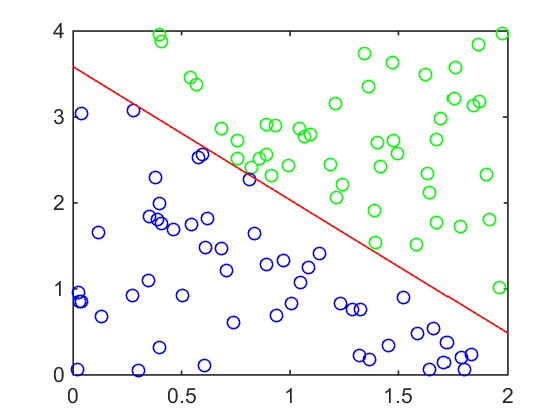

In [5]:
%%
y = double(y);
y(y == 0) = -1;

clear w

cvx_begin quiet
    variable w(3,1)
    maximize( -sum(log_sum_exp([zeros(1,m); (y.*(X*w))'])))
cvx_end

xp = 0:0.1:2;
yp = (-w(3) - w(1)*xp)./w(2);

plot(X(c1,1),X(c1,2),'go',X(c2,1),X(c2,2),'bo'),    hold on
plot(xp,yp,'r'),    hold off

## 1.4. Logistic Regression with Gradient Descent (Optional)


- Logistic regression
$$
\begin{align*}
J(\omega) = \sum\limits_{n=1}^{m}{\log \left(1+\exp \left(-y_n\omega^T x_n \right) \right)}
\end{align*} $$
- Gradient and Hessian given by:
$$
\begin{align*}
\Delta_{\omega}J(\omega) &= -X^T Z y\\
\Delta_{\omega}^2J(\omega) &= -X^T Z(I-Z) X\\
\end{align*}
$$
 where
$$Z \in \mathbb{R}^{m\times m}, \qquad Z_{nn} = \frac{1}{1+\exp \left(-y_n\omega^T x_n \right) }$$


- See how fast it is in terms of computional time

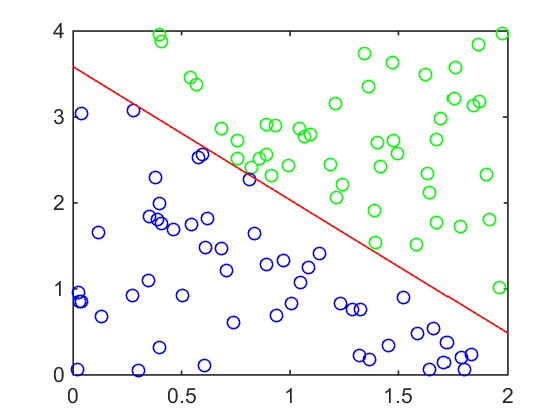

In [9]:
%% logistic regression using gradient descent

y = double(y);
y(y == 0) = -1;

k = size(X,2);
theta = zeros(k,1);

g = 1;

while (norm(g) > 1e-10)
    z = 1./(1 + exp(y.*(X*theta)));
    g = -X'*(z.*y);
    H = X'*diag(z.*(1-z))*X;
    theta = theta - H\g;    
end

%% plot

xp = 0:0.1:2;
yp = (-w(3) - w(1)*xp)./w(2);

plot(X(c1,1),X(c1,2),'go',X(c2,1),X(c2,2),'bo'),    hold on
plot(xp,yp,'r'),    hold off

# 2. Multiclass classification (optional)

- Generalization to more than 2 classes is straightforward
- Using the soft-max function instead of the logistic function

$$P\left(y = k \mid x,\omega\right) = \frac{\exp{\left( \omega_k^T x \right) }}{\sum_k \exp{\left(\omega_k^T x \right)}} \in [0,1]$$

- We maintain a separator weight vector $\omega_k$ for each class $k$

# 3. Non-linear classification (optional)

- Same idea as for linear regression: non-linear features, either explicit or using Kernels

In [11]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>